#### 1. Data Retrieval

In [119]:
import requests

current_quiz_url = "https://api.jsonserve.com/rJvd7g"
historical_quiz_url = "https://api.jsonserve.com/XgAgFJ"

current_quiz_data = requests.get(current_quiz_url).json()
historical_quiz_data = requests.get(historical_quiz_url).json()


In [120]:
import json
print(json.dumps(current_quiz_data, indent=4))


{
    "id": 336566,
    "quiz_id": 43,
    "user_id": "7ZXdz3zHuNcdg9agb5YpaOGLQqw2",
    "submitted_at": "2025-01-17T15:51:29.859+05:30",
    "created_at": "2025-01-17T15:51:29.871+05:30",
    "updated_at": "2025-01-17T15:51:29.871+05:30",
    "score": 32,
    "trophy_level": 2,
    "accuracy": "80 %",
    "speed": "100",
    "final_score": "30.0",
    "negative_score": "2.0",
    "correct_answers": 8,
    "incorrect_answers": 2,
    "source": "live",
    "type": "topic",
    "started_at": "2025-01-17T16:20:44.000+05:30",
    "ended_at": "2025-01-17T16:21:28.000+05:30",
    "duration": "15:00",
    "better_than": 24,
    "total_questions": 128,
    "rank_text": "Topic Rank - #2402",
    "mistakes_corrected": 6,
    "initial_mistake_count": 8,
    "response_map": {
        "1837": 7363,
        "1848": 7407,
        "1852": 7423,
        "1862": 7464,
        "1877": 7525,
        "1878": 7529,
        "1900": 7617,
        "1917": 7685,
        "1934": 7750,
        "1964": 7872
    }

#### 2. Data Exploration and Analysis

In [121]:
from pandas import json_normalize

current_df = json_normalize(current_quiz_data)
historical_df = json_normalize(historical_quiz_data)


In [122]:
print(current_df.columns)

Index(['id', 'quiz_id', 'user_id', 'submitted_at', 'created_at', 'updated_at',
       'score', 'trophy_level', 'accuracy', 'speed', 'final_score',
       'negative_score', 'correct_answers', 'incorrect_answers', 'source',
       'type', 'started_at', 'ended_at', 'duration', 'better_than',
       'total_questions', 'rank_text', 'mistakes_corrected',
       'initial_mistake_count', 'next_steps', 'response_map.1837',
       'response_map.1848', 'response_map.1852', 'response_map.1862',
       'response_map.1877', 'response_map.1878', 'response_map.1900',
       'response_map.1917', 'response_map.1934', 'response_map.1964',
       'quiz.id', 'quiz.name', 'quiz.title', 'quiz.description',
       'quiz.difficulty_level', 'quiz.topic', 'quiz.time', 'quiz.is_published',
       'quiz.created_at', 'quiz.updated_at', 'quiz.duration', 'quiz.end_time',
       'quiz.negative_marks', 'quiz.correct_answer_marks', 'quiz.shuffle',
       'quiz.show_answers', 'quiz.lock_solutions', 'quiz.is_form',
      

In [123]:
historical_df.head()

,id,quiz_id,user_id,submitted_at,created_at,updated_at,score,trophy_level,accuracy,speed,...,response_map.3194,response_map.2417,response_map.2425,response_map.2435,response_map.2440,response_map.2444,response_map.2452,response_map.2459,response_map.2469,response_map.2515
0,336497,51,YcDFSO4ZukTJnnFMgRNVwZTE4j42,2025-01-17T15:30:18.027+05:30,2025-01-17T15:30:18.044+05:30,2025-01-17T15:30:18.044+05:30,108,2,90 %,100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,336448,6,YcDFSO4ZukTJnnFMgRNVwZTE4j42,2025-01-17T15:17:44.042+05:30,2025-01-17T15:17:44.056+05:30,2025-01-17T15:17:44.056+05:30,92,1,100 %,100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,333330,51,YcDFSO4ZukTJnnFMgRNVwZTE4j42,2025-01-16T20:13:19.682+05:30,2025-01-16T20:13:19.699+05:30,2025-01-16T20:13:19.699+05:30,116,2,96 %,100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,333242,6,YcDFSO4ZukTJnnFMgRNVwZTE4j42,2025-01-16T20:00:11.562+05:30,2025-01-16T20:00:11.573+05:30,2025-01-16T20:00:11.573+05:30,36,2,90 %,100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,329504,51,YcDFSO4ZukTJnnFMgRNVwZTE4j42,2025-01-15T20:34:39.462+05:30,2025-01-15T20:34:39.478+05:30,2025-01-15T20:34:39.478+05:30,36,3,31 %,96,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [124]:
# Remove all columns starting with 'response_map'
historical_df = historical_df.loc[:, ~historical_df.columns.str.startswith('response_map')]

# Check the result
print(historical_df.columns)


Index(['id', 'quiz_id', 'user_id', 'submitted_at', 'created_at', 'updated_at',
       'score', 'trophy_level', 'accuracy', 'speed', 'final_score',
       'negative_score', 'correct_answers', 'incorrect_answers', 'source',
       'type', 'started_at', 'ended_at', 'duration', 'better_than',
       'total_questions', 'rank_text', 'mistakes_corrected',
       'initial_mistake_count', 'quiz.id', 'quiz.name', 'quiz.title',
       'quiz.description', 'quiz.difficulty_level', 'quiz.topic', 'quiz.time',
       'quiz.is_published', 'quiz.created_at', 'quiz.updated_at',
       'quiz.duration', 'quiz.end_time', 'quiz.negative_marks',
       'quiz.correct_answer_marks', 'quiz.shuffle', 'quiz.show_answers',
       'quiz.lock_solutions', 'quiz.is_form', 'quiz.show_mastery_option',
       'quiz.reading_material', 'quiz.quiz_type', 'quiz.is_custom',
       'quiz.banner_id', 'quiz.exam_id', 'quiz.show_unanswered',
       'quiz.ends_at', 'quiz.lives', 'quiz.live_count', 'quiz.coin_count',
       'quiz.qu

In [125]:
historical_df['quiz.correct_answer_marks'] = historical_df['quiz.correct_answer_marks'].str.replace(r'[^0-9.]', '', regex=True)
historical_df['quiz.correct_answer_marks'] = pd.to_numeric(historical_df['quiz.correct_answer_marks'], errors='coerce')

In [126]:
topic_accuracy = historical_df.groupby("quiz.topic")["quiz.correct_answer_marks"].mean()


In [127]:
df=historical_df['quiz.difficulty_level']
print(df)

0     None
1     None
2     None
3     None
4     None
5     None
6     None
7     None
8     None
9     None
10    None
11    None
12    None
13    None
Name: quiz.difficulty_level, dtype: object


#### 3. Insights Generation

##### This is accuracy per topic

In [128]:
# Calculate accuracy per topic for historical data
historical_topic_accuracy = historical_df.groupby("quiz.topic")["correct_answers"].mean()

# Calculate accuracy per topic for current data
current_topic_accuracy = current_df.groupby("quiz.topic")["correct_answers"].mean()

# Display the results
print("Historical Topic Accuracy:\n", historical_topic_accuracy)
print("Current Topic Accuracy:\n", current_topic_accuracy)


Historical Topic Accuracy:
 quiz.topic
Body Fluids and Circulation                 21.666667
Body Fluids and Circulation                 13.666667
Human Reproduction                          10.000000
Reproductive Health                         13.000000
Respiration and Gas Exchange                 6.000000
human health and disease                    28.000000
microbes in human welfare                   19.000000
principles of inheritance and variation      3.000000
reproductive health                         13.000000
Name: correct_answers, dtype: float64
Current Topic Accuracy:
 quiz.topic
Structural Organisation in Animals    8.0
Name: correct_answers, dtype: float64


##### Weak Areas

Weak Areas in Historical Data:
 {'Body Fluids and Circulation ': 13.666666666666666, 'Human Reproduction': 10.0, 'Reproductive Health': 13.0, 'Respiration and Gas Exchange': 6.0, 'microbes in human welfare': 19.0, 'principles of inheritance and variation ': 3.0, 'reproductive health ': 13.0}
Weak Areas in Current Data:
 {'Structural Organisation in Animals': 8.0}


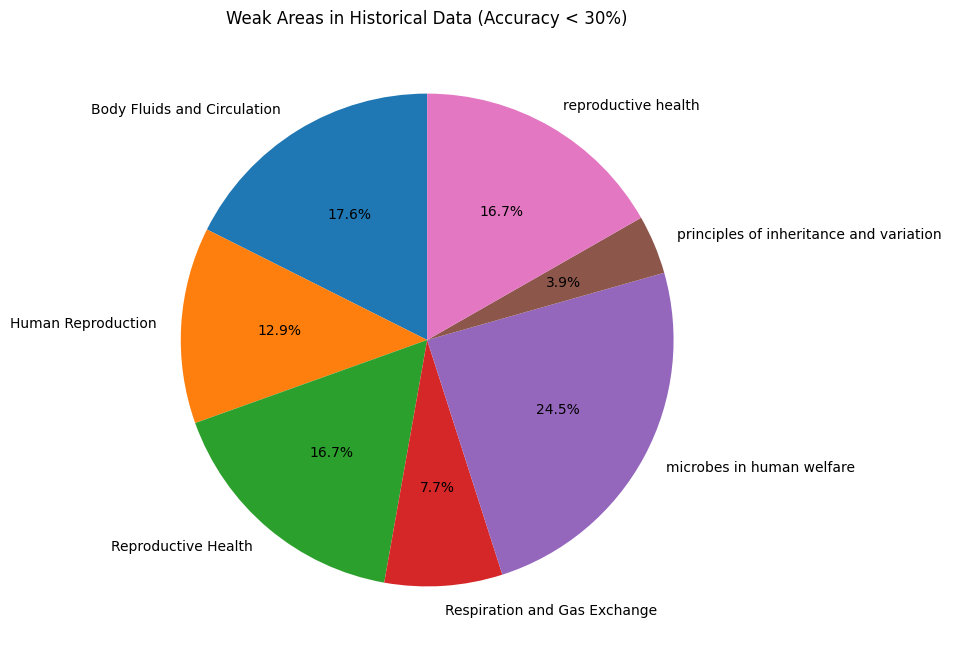

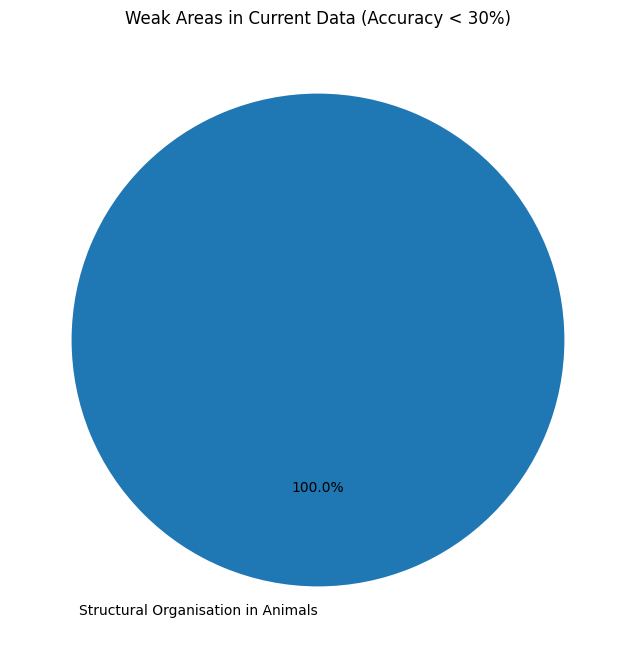

In [129]:
# Identify weak areas (topics with average accuracy below 50%)
# weak_areas_historical = historical_topic_accuracy[historical_topic_accuracy < 5]
# weak_areas_current = current_topic_accuracy[current_topic_accuracy < 5]
weak_areas_historical = {k: v for k, v in historical_topic_accuracy.items() if v < 20}
weak_areas_current = {k: v for k, v in current_topic_accuracy.items() if v < 20}

strong_areas_historical= {k: v for k, v in historical_topic_accuracy.items() if v > 20}

# Display weak areas
print("Weak Areas in Historical Data:\n", weak_areas_historical)
print("Weak Areas in Current Data:\n", weak_areas_current)

import matplotlib.pyplot as plt
import numpy as np
# # Sample weak areas data for demonstration (replace with real data)
# weak_areas_historical = {"Math": 0.4, "Physics": 0.3, "Biology": 0.45}
# weak_areas_current = {"Math": 0.5, "Chemistry": 0.35, "Biology": 0.4}

# Plot pie chart for weak areas in historical data
plt.figure(figsize=(8, 8))
plt.pie(
    list(weak_areas_historical.values()), 
    labels=list(weak_areas_historical.keys()), 
    autopct='%1.1f%%', 
    startangle=90
)
plt.title("Weak Areas in Historical Data (Accuracy < 30%)")
plt.show()

# Plot pie chart for weak areas in current data
plt.figure(figsize=(8, 8))
plt.pie(
    list(weak_areas_current.values()), 
    labels=list(weak_areas_current.keys()), 
    autopct='%1.1f%%', 
    startangle=90
)
plt.title("Weak Areas in Current Data (Accuracy < 30%)")
plt.show()



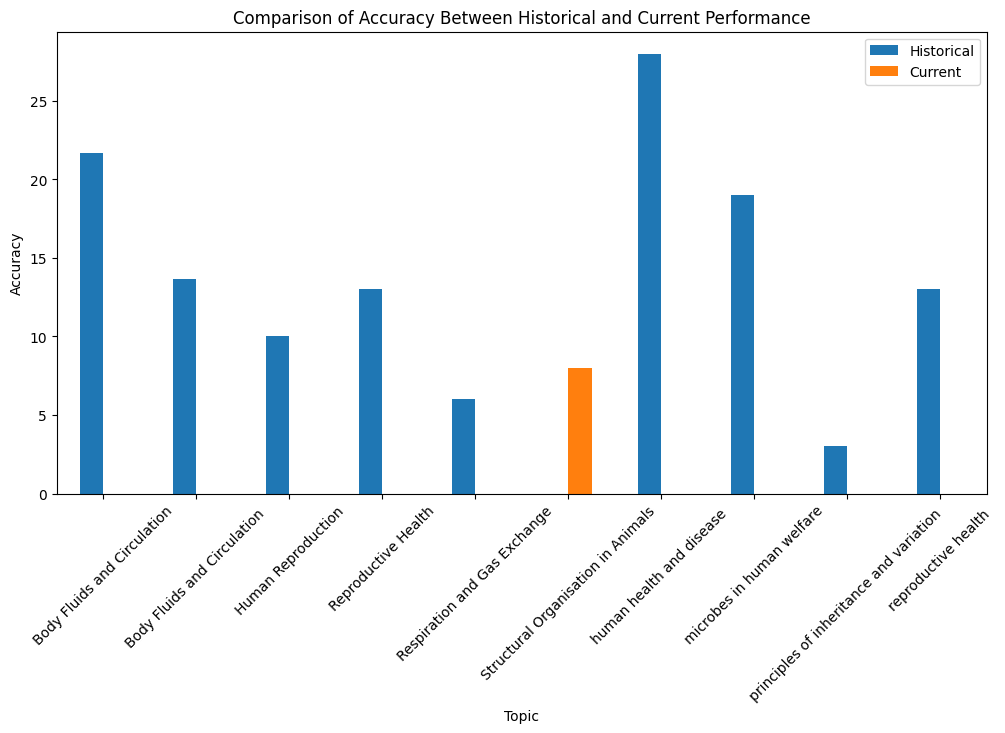

In [130]:
# Compare topic accuracy between historical and current data
topic_comparison = pd.DataFrame({
    "Historical": historical_topic_accuracy,
    "Current": current_topic_accuracy
})

topic_comparison.plot(kind='bar', figsize=(12, 6))
plt.title("Comparison of Accuracy Between Historical and Current Performance")
plt.ylabel("Accuracy")
plt.xlabel("Topic")
plt.xticks(rotation=45)
plt.show()


In [131]:
correlation = historical_df[["score", "correct_answers"]].corr()
print("Correlation Matrix:\n", correlation)


Correlation Matrix:
                  score  correct_answers
score              1.0              1.0
correct_answers    1.0              1.0


 this result suggests that "score" is completely dependent on "correct_answers".

#### 4.Recommendation system

In [132]:
import pandas as pd

# Recommendation System
def generate_recommendations(weak_areas, strong_areas):
    recommendations = []

    # Recommendations for Weak Areas
    for topic, accuracy in weak_areas.items():
        recommendations.append(f"Focus on the topic '{topic}' with {accuracy:.2f}% accuracy. Start with basic concepts and easy questions.")
    
    # Recommendations for Strong Areas
    for topic, accuracy in strong_areas.items():
        recommendations.append(f"Keep up the great work in '{topic}' with {accuracy:.2f}% accuracy. Attempt advanced-level questions for mastery.")

    # General Study Plan
    recommendations.append("Allocate 70% of your time to weak areas and 30% to strengthen already strong topics.")
    recommendations.append("Regularly attempt quizzes to track your progress and adapt the study plan accordingly.")

    return recommendations

# Generate Recommendations
recommendations = generate_recommendations(weak_areas_historical, strong_areas_historical)

# Display Recommendations
for i, rec in enumerate(recommendations, 1):
    print(f"{i}. {rec}")


1. Focus on the topic 'Body Fluids and Circulation ' with 13.67% accuracy. Start with basic concepts and easy questions.
2. Focus on the topic 'Human Reproduction' with 10.00% accuracy. Start with basic concepts and easy questions.
3. Focus on the topic 'Reproductive Health' with 13.00% accuracy. Start with basic concepts and easy questions.
4. Focus on the topic 'Respiration and Gas Exchange' with 6.00% accuracy. Start with basic concepts and easy questions.
5. Focus on the topic 'microbes in human welfare' with 19.00% accuracy. Start with basic concepts and easy questions.
6. Focus on the topic 'principles of inheritance and variation ' with 3.00% accuracy. Start with basic concepts and easy questions.
7. Focus on the topic 'reproductive health ' with 13.00% accuracy. Start with basic concepts and easy questions.
8. Keep up the great work in 'Body Fluids and Circulation' with 21.67% accuracy. Attempt advanced-level questions for mastery.
9. Keep up the great work in 'human health and